***Anurag Sharma (24AI91R01)***

In [290]:
#importing the required libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Task 1
Load and preprocess the Bike Sharing dataset
Check for missing and duplicate values and remove them if found

In [291]:
#load the csv file
data = pd.read_csv('Bike_sharing_dataset_hour.csv')

In [292]:
#saving a backup copy
df = data.copy()

In [293]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [294]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [295]:
#we drop casual, registered, instant, dteday
df.drop(['casual', 'registered', 'instant',], axis=1, inplace=True)

In [296]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [297]:
#we check for duplicate entries
df.duplicated().sum()

0

There are no duplicate entries

In [298]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [299]:
#check for missing values
df.isnull().sum()

,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


There are no missing values

In [300]:
#remove missing entries
df.dropna(inplace=True)

#Task 2

Data Pre-processing:

Perform one-hot encoding of the categorical features when necessary (not necessary if there is a natural ordering between categories)

Perform feature scaling

In [301]:
df.shape

(17379, 14)

In [302]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [303]:
# We perform one-hot encoding of categorical features {'season', 'weathersit'}, other features are in natural ordering
df = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True, dtype=int)
df = df.drop(['dteday','instant',],axis=1)
#we define features and target
X = df.drop('cnt', axis=1)
y = df['cnt'].to_numpy()

In [304]:
#Performing feature scaling on the X (features)
scaler = StandardScaler()
X[['temp','atemp','hum','windspeed']] = scaler.fit_transform(X[['temp','atemp','hum','windspeed']])

# Task 3

Data Splitting - divide the data into training, validation and test sets (70%-15%-15%).

In [305]:
# we split the data in train, test, and val set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Task 4
Model Design: design a neural network having N hidden layers using the following specifications:

The number of units in each hidden layer as 128, 64, 32, and so on

Activation function in each hidden layer: ReLU

What activation function should you choose for the output layer for this prediction problem? design the model accordingly.

*Answer: Since it's a regression problem, we don't use any activation functions for the output layer.*

In [307]:
class My_custom_NN(nn.Module):
    def __init__(self, input_dim, hidden_layers_count):
        super(My_custom_NN, self).__init__()

        # we set the number of units in each hidden layer
        hidden_units = self._calculate_hidden_units(hidden_layers_count)

        # building the layers of the network
        layers = []
        # input layer: transforms from input dimension to the first hidden layer
        layers.append(nn.Linear(input_dim, hidden_units[0]))
        layers.append(nn.ReLU())  # ReLU activation for hidden layers (as per the task)

        # hidden layers: each layer transforms from the previous layer's units to the current layer's units
        for i in range(1, hidden_layers_count):
            layers.append(nn.Linear(hidden_units[i-1], hidden_units[i]))
            layers.append(nn.ReLU())

        # output layer: reduces the final hidden layer's units to a single output unit for regression
        layers.append(nn.Linear(hidden_units[-1], 1))

        # creating a sequential model from the list of layers
        self.network = nn.Sequential(*layers)

    #to calculate the number of units for each hidden layer
    def _calculate_hidden_units(self, num_hidden_layers):
        units = [256]  # strat from 256 units in the first hidden layer
        for _ in range(1, num_hidden_layers):
            k = units[-1] // 2  # to find the number of units in the next layer
            units.append(k)  # each subsequent layer has half the units of the previous layer
        return units

    # defining the forward pass of the network
    def forward(self, x):
        return self.network(x)

In [308]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Task 5

Cost function: define a cost function suitable for this problem.

Optimization: Use the SGD optimizer to optimize this cost function using backpropagation.

*(done in task 6)*

# Task 6
Perform cross-validation to find the best value of N using grid search

In [313]:
def train_and_evaluate_model(num_epochs, hidden_layer_options, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor):
    # Initialize tracking variables
    best_mse = float('inf')  # Best Mean Squared Error across models
    best_model = None  # Model with the lowest validation MSE
    best_num_hidden_layers = None  # Number of hidden layers for the best model

    # Dictionaries to store losses for each N hidden layes
    train_losses_dict = {}
    val_losses_dict = {}

    for num_hidden_layers in hidden_layer_options:
        print(f"\nTraining model with {num_hidden_layers} hidden layers")

        # Initialize the model
        model = My_custom_NN(input_dim=X_train_tensor.shape[1], hidden_layers_count=num_hidden_layers)

        criterion = nn.MSELoss() # cost function
        # optimizer = optim.SGD(model.parameters())
        optimizer = optim.Adam(model.parameters(), lr=0.01) # to optimize this cost function using backpropagation
        # to store training and validation losses
        train_losses = []
        val_losses = []

        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate validation loss
            with torch.no_grad():
                val_outputs = model(X_val_tensor)
                val_loss = criterion(val_outputs, y_val_tensor)

            # Store the losses
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())

            if epoch % 20 == 0:
                print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

        # Store losses for the current model
        train_losses_dict[num_hidden_layers] = train_losses
        val_losses_dict[num_hidden_layers] = val_losses

        # Update the best model based on validation loss
        current_best_val_loss = min(val_losses)
        if current_best_val_loss < best_mse:
            best_mse = current_best_val_loss
            best_model = model
            best_num_hidden_layers = num_hidden_layers

    return best_mse, best_model, best_num_hidden_layers

In [317]:
# we check for {3,4,5,6,7} no. of hidden layers
# no. of epochs are 200
num_of_hidden_layers = [3,4,5,6,7]
best_mse, best_model, best_num_hidden_layers = train_and_evaluate_model(
    num_epochs=200,
    hidden_layer_options=num_of_hidden_layers,
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_val_tensor=X_val_tensor,
    y_val_tensor=y_val_tensor
)


Training model with 3 hidden layers
Epoch [0/200], Train Loss: 71347.4922, Val Loss: 37328.3711
Epoch [20/200], Train Loss: 4270.3413, Val Loss: 4163.7793
Epoch [40/200], Train Loss: 34.6793, Val Loss: 118.5169
Epoch [60/200], Train Loss: 9.6784, Val Loss: 17.6762
Epoch [80/200], Train Loss: 5.8027, Val Loss: 5.5504
Epoch [100/200], Train Loss: 1.1201, Val Loss: 1.3996
Epoch [120/200], Train Loss: 0.5814, Val Loss: 0.5099
Epoch [140/200], Train Loss: 0.3221, Val Loss: 0.3096
Epoch [160/200], Train Loss: 0.2293, Val Loss: 0.2196
Epoch [180/200], Train Loss: 0.1732, Val Loss: 0.1680

Training model with 4 hidden layers
Epoch [0/200], Train Loss: 69816.8906, Val Loss: 54794.9180
Epoch [20/200], Train Loss: 1383.8768, Val Loss: 43.3829
Epoch [40/200], Train Loss: 49.7078, Val Loss: 285.2954
Epoch [60/200], Train Loss: 9.5061, Val Loss: 7.6732
Epoch [80/200], Train Loss: 2.6621, Val Loss: 2.2787
Epoch [100/200], Train Loss: 1.0837, Val Loss: 1.0604
Epoch [120/200], Train Loss: 0.5744, Val 

# Task 7
Loss Plots: plot the training and validation losses for each value of N (on the same graph).

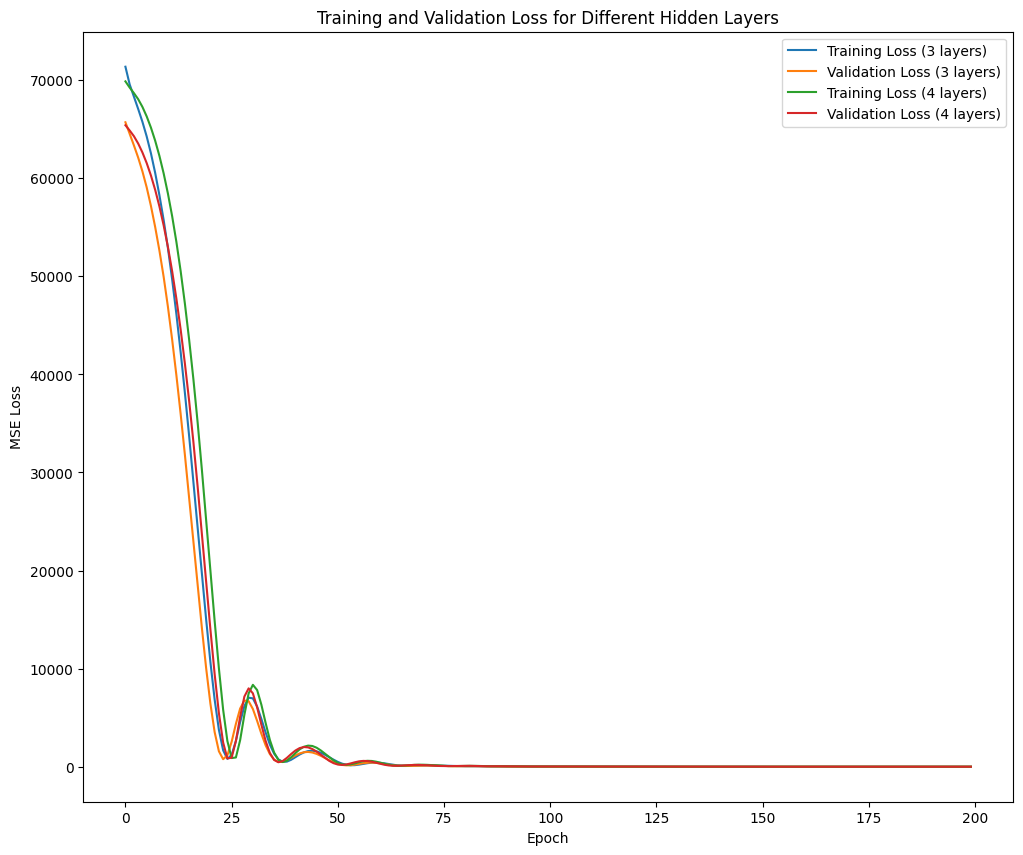

In [318]:
plt.figure(figsize=(12, 10))
for num_hidden_layers, train_losses in train_losses_dict.items():
    val_losses = val_losses_dict[num_hidden_layers]
    plt.plot(train_losses, label=f'Training Loss ({num_hidden_layers} layers)')
    plt.plot(val_losses, label=f'Validation Loss ({num_hidden_layers} layers)')
# plt.figure(figsize=(12, 8))
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss for Different Hidden Layers')
plt.legend()
plt.show()

# Task 8
What is the best value of the number of hidden layers (N) for this problem that you obtained with cross-validation? Justify your answer.

In [321]:
print(f'Best number of hidden layers: {Best_num_of_hidden_layers}')

Best number of hidden layers: 4


Answer:


*   Adding too many layers can cause the gradients to become excessively small during backpropagation, which may prevent the model from converging effectively.
*  Local minima: With more layers, the gradient descent process might get trapped in local minima, hindering the model’s ability to find the global minimum and resulting in higher MSE values.

# Task 9
Report the MSE on the test set obtained with the model trained with the best value of N that you reported in the previous question

In [322]:
with torch.no_grad():
    test_outputs = Best_model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Calculate MSE
y_pred = test_outputs.numpy().flatten()
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) on test data: {mse:.4f}')

Test Loss: 0.3815
Mean Squared Error (MSE) on test data: 0.3815


*MSE on the test = 0.3815*

# Task 10
Show a scatter plot of the predictions against the true values for the predictions for the best model that you obtained.

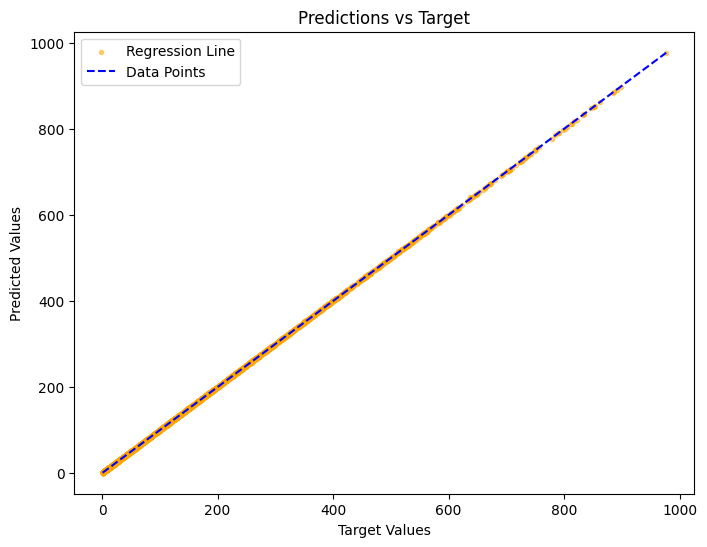

In [323]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='.',color='orange',alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue')
plt.xlabel("Target Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Target")
plt.legend(['Regression Line', 'Data Points'])
plt.show()